<a href="https://colab.research.google.com/github/Mrityunjay835/House-price-preduction/blob/main/House_Pricing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependency.

Our task is to preduct the house price.

In [ ]:

# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.datasets import fetch_california_housing

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the Boston House Price Dataset


In [ ]:
#url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
house_price_dataframe = pd.read_csv("/content/train.csv")
print(house_price_dataframe.keys())

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


In [ ]:
print(house_price_dataframe)

      ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0      1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1      2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2      4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3      5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4      7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   
..   ...      ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
328  500  0.17783   0.0   9.69     0  0.585  5.569  73.5  2.3999    6  391   
329  502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
330  503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
331  504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
332  506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  medv  
0       15.3  396.90   4.98

In [ ]:
# Loading the dataset to a Pandas DataFrame
house_price_dataframe.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [ ]:
# add the target (price) column to the DataFrame
print(house_price_dataframe['medv'])

0      24.0
1      21.6
2      33.4
3      36.2
4      22.9
       ... 
328    17.5
329    22.4
330    20.6
331    23.9
332    11.9
Name: medv, Length: 333, dtype: float64


In [ ]:
# checking the number of rows and Columns in the data frame
house_price_dataframe.shape

(333, 15)

In [ ]:
# check for missing values
house_price_dataframe.isnull().sum()

,0
ID,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0


In [ ]:
# statistical measures of the dataset
house_price_dataframe.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


Understanding the correlation between various features in the dataset

1. Positive Correlation

2. Negative Correlation

In [ ]:
correlation = house_price_dataframe.corr()

<Axes: >

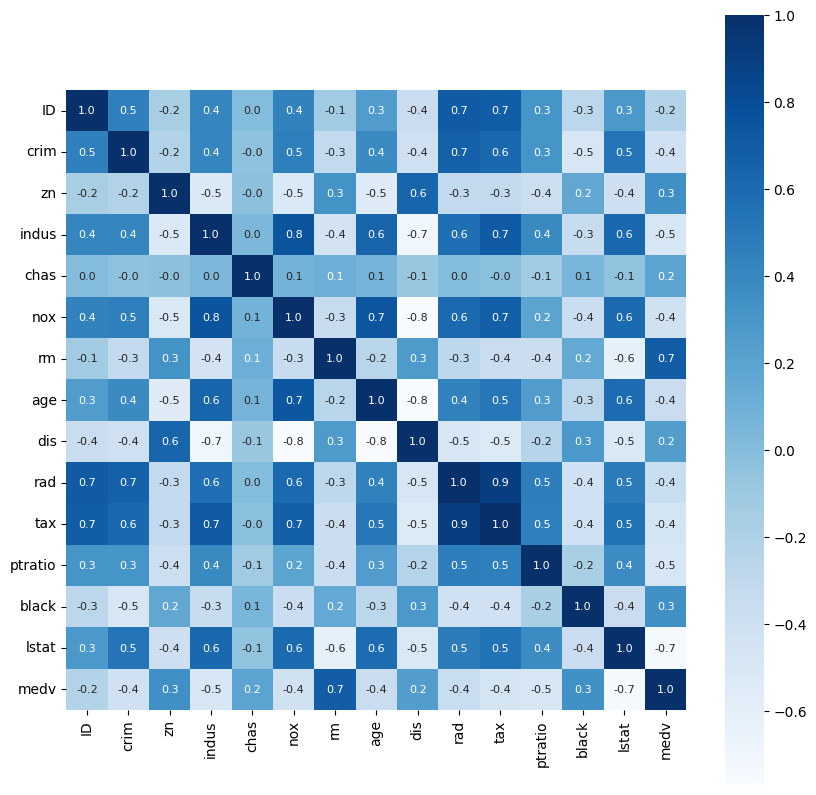

In [ ]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data and Target

In [ ]:
X = house_price_dataframe.drop(['medv'], axis=1)
Y = house_price_dataframe['medv']

In [ ]:
print(X)
print(Y)

      ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0      1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1      2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2      4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3      5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4      7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   
..   ...      ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
328  500  0.17783   0.0   9.69     0  0.585  5.569  73.5  2.3999    6  391   
329  502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
330  503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
331  504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
332  506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  
0       15.3  396.90   4.98  
1  

Splitting the data into Training data and Test


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(333, 14) (266, 14) (67, 14)


Model Training using XGBoost Regressor

In [ ]:
# loading the model
model = XGBRegressor()

In [ ]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Evaluation

Prediction on training data

In [ ]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[22.204096  39.79998   27.500294  24.405659   9.703163  24.993803
 23.099045  27.899893  20.802292  20.099463  14.599959  22.01207
 24.992737  22.299623  33.40149   37.903328  29.000708  11.310613
 19.398117  23.79305    5.0044417  7.1984463 24.301428  34.90184
 19.797123  33.805244  31.500282  12.000008  22.198503  28.095797
 13.299748  19.500338  16.104418  25.199505  28.002058  22.899118
 19.90101   20.099995  26.394102  10.50118   49.995323  18.799643
 21.799812  35.19858   12.689162  31.598934  25.299421  19.612507
 18.900578  32.20227   23.705105  13.499828  20.005415  49.99624
 49.996326  14.102027  32.70273   43.098858   8.701353  19.502687
 25.101501  20.100523  16.202007  25.002531  19.593216   8.300546
 30.092321  12.700516  17.093733  16.300388  26.208044  19.396973
 22.587284  14.902602  22.600748  19.995163  27.503958  19.404533
 50.00398   30.49228   24.098082  17.102879  15.403405  36.996727
 15.000718  36.50017   50.000786  20.398214  37.601955  22.29545
 28.39974   19

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.999999786870272
Mean Absolute Error :  0.0027596559739651296



Visualizing the actual Prices and predicted prices

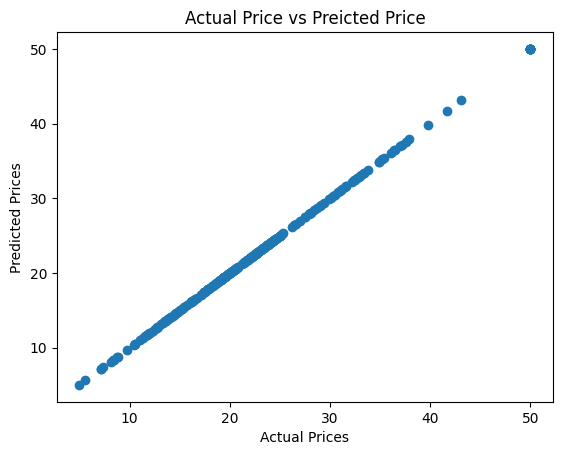

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediciton on test Data

In [ ]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8883009392895852
Mean Absolute Error :  2.480352363301747


In [ ]:
test_data = pd.read_csv("/content/test.csv")  # Load your test data
predictions = model.predict(test_data)

In [ ]:
output = pd.DataFrame({'ID': test_data.ID, 'medv': predictions})
submission_file = 'submission.csv'
output.to_csv(submission_file, index=False)
print("Submission file saved successfully!")

Submission file saved successfully!
